# Pandas基本介绍

In [22]:
# 来源于莫烦Python

# Numpy 是列表形式的，没有数值标签，而 Pandas 就是字典形式
# pandas，首先需要了解他主要两个数据结构：Series和DataFrame

# Series
import pandas as pd
import numpy as np

s = pd.Series([1, 3, 6, np.nan, 44, 1])
print(s)
# Series的字符串表现形式为：索引在左边，值在右边。由于我们没有为数据指定索引。于是会自动创建一个0到N-1（N为长度）的整数型索引

# DataFrame
dates = pd.date_range("20160101", periods=6)
df = pd.DataFrame(np.random.randn(6, 4), index=dates, columns=['a', 'b', 'c', 'd'])
print(df)
# DataFrame是一个表格型的数据结构，它包含有一组有序的列，每列可以是不同的值类型（数值，字符串，布尔值等）。
# DataFrame既有行索引也有列索引， 它可以被看做由Series组成的大字典

# DataFrame的一些简单应用
print(df['b'])

# 创建一组没给定行标签和列标签的数据df1
df1 = pd.DataFrame(np.arange(12).reshape((3, 4)))
print(df1)
# 会采取默认的从0开始 index


# 还有一种生成df的方法
df2 = pd.DataFrame({
    'A':1.,
    'B':pd.Timestamp('20130102'),
    'C':pd.Series(1, index=list(range(4)), dtype='float32'),
    'D':np.array([3]*4, dtype='int32'),
    'E':pd.Categorical(["test", "train", "test", "train"]),
    'F':'foo'
})
print(df2)
# 这种方法能对每一列的数据进行特殊对待

# 查看数据中的类型
print(df2.dtypes)

# 查看列
print(df2.index)

# 查看行
print(df2.columns)

# 只看df2的值
print(df2.values)

# 查看数据的总结
df2.describe()

# 翻转数据
print(df2.T)

# 对数据的index进行排序输出
print(df2)
print(df2.sort_index(axis=1, ascending=False))
# 参考：http://www.imooc.com/qadetail/260039
# 参考：https://blog.csdn.net/starter_____/article/details/79183733

# 对数据 值 排序输出
print(df2.sort_values(by='B'))
# 参考：https://blog.csdn.net/wendaomudong_l2d4/article/details/80648633

0     1.0
1     3.0
2     6.0
3     NaN
4    44.0
5     1.0
dtype: float64
                   a         b         c         d
2016-01-01  0.548400 -0.304329  2.038849  0.073865
2016-01-02  1.569736  2.158594  0.634008  0.245670
2016-01-03 -0.334375  0.694828  0.095672 -2.106540
2016-01-04  0.801008  0.285273  1.399662 -0.074177
2016-01-05 -0.603843  0.958690  0.231455 -1.137628
2016-01-06  1.491425  1.287002 -0.714882 -1.085810
2016-01-01   -0.304329
2016-01-02    2.158594
2016-01-03    0.694828
2016-01-04    0.285273
2016-01-05    0.958690
2016-01-06    1.287002
Freq: D, Name: b, dtype: float64
   0  1   2   3
0  0  1   2   3
1  4  5   6   7
2  8  9  10  11
     A          B    C  D      E    F
0  1.0 2013-01-02  1.0  3   test  foo
1  1.0 2013-01-02  1.0  3  train  foo
2  1.0 2013-01-02  1.0  3   test  foo
3  1.0 2013-01-02  1.0  3  train  foo
A           float64
B    datetime64[ns]
C           float32
D             int32
E          category
F            object
dtype: object
Int64Inde

# Pandas 选择数据

In [44]:
# 建立一个6X4的矩阵数据
datas = pd.date_range('20130101', periods=6)
df = pd.DataFrame(np.arange(24).reshape((6, 4)), index=datas, columns=['A', 'B', 'C', 'D'])
print(df)

# 简单的筛选
print(df['A'])
# 也可以 print(df.A)

# 筛选多行多列
print(df[0:3])
print(df[0:2]) # 测试表明这是筛选行的
print('######')
print(df['20130102':'20130104'])

# 根据标签 loc
#使用标签来选择数据 loc, 本例子主要通过标签名字选择某一行数据， 或者通过选择某行或者所有行（:代表所有行）然后选其中某一列或几列数据
print(df.loc['20130102'])

print(df.loc[:, ['A', 'B']])

print(df.loc['20130102', ['A', 'B']])



# 根据序列 iloc
# 采用位置进行选择 iloc, 在这里我们可以通过位置选择在不同情况下所需要的数据例如选某一个，连续选或者跨行选等操作
print(df.iloc[3, 1])

print(df.iloc[3:5, 1:3]) # 输出3-4行，1-2列的数据

print(df.iloc[[1, 3, 5], 1:3])

# 混合上面两种，既想采用标签也想采用位置选取元素
# 采用混合选择 ix
# print(df.ix[:3, ['A', 'C']])
# emmm,好像这个方法已经被弃用了

# 通过判断的筛选
print(df[df.A > 8])

             A   B   C   D
2013-01-01   0   1   2   3
2013-01-02   4   5   6   7
2013-01-03   8   9  10  11
2013-01-04  12  13  14  15
2013-01-05  16  17  18  19
2013-01-06  20  21  22  23
2013-01-01     0
2013-01-02     4
2013-01-03     8
2013-01-04    12
2013-01-05    16
2013-01-06    20
Freq: D, Name: A, dtype: int64
            A  B   C   D
2013-01-01  0  1   2   3
2013-01-02  4  5   6   7
2013-01-03  8  9  10  11
            A  B  C  D
2013-01-01  0  1  2  3
2013-01-02  4  5  6  7
######
             A   B   C   D
2013-01-02   4   5   6   7
2013-01-03   8   9  10  11
2013-01-04  12  13  14  15
A    4
B    5
C    6
D    7
Name: 2013-01-02 00:00:00, dtype: int64
             A   B
2013-01-01   0   1
2013-01-02   4   5
2013-01-03   8   9
2013-01-04  12  13
2013-01-05  16  17
2013-01-06  20  21
A    4
B    5
Name: 2013-01-02 00:00:00, dtype: int64
13
             B   C
2013-01-04  13  14
2013-01-05  17  18
             B   C
2013-01-02   5   6
2013-01-04  13  14
2013-01-06  21  22
   

# Pandas 设置值

In [60]:
# 创建数据
dates = pd.date_range('20130101', periods=6)
df = pd.DataFrame(np.arange(24).reshape((6, 4)), index=dates, columns=['A', 'B', 'C', 'D'])
print(df)

# 根据位置设置 loc 和 iloc
# 可以利用索引或者标签确定需要修改值的位置
df.iloc[2, 2] = 1111
df.loc['20130101', 'B'] = 2222
print(df)

# 根据条件设置
df.B[df.A > 4] = 0
print(df)

# 按行或列设置
df['F'] = np.nan
# df.loc[len(df)]  = [1, 1, 1, 1, np.nan] # 从末尾添加新行
print(df)
# 参考：http://www.cnblogs.com/guxh/p/9420610.html    pandas删除行删除列，增加行增加列

# 添加数据
df['E'] = pd.Series([1, 2, 3, 4, 5, 6], index=pd.date_range('20130101', periods=6))
print(df)

             A   B   C   D
2013-01-01   0   1   2   3
2013-01-02   4   5   6   7
2013-01-03   8   9  10  11
2013-01-04  12  13  14  15
2013-01-05  16  17  18  19
2013-01-06  20  21  22  23
             A     B     C   D
2013-01-01   0  2222     2   3
2013-01-02   4     5     6   7
2013-01-03   8     9  1111  11
2013-01-04  12    13    14  15
2013-01-05  16    17    18  19
2013-01-06  20    21    22  23
             A     B     C   D
2013-01-01   0  2222     2   3
2013-01-02   4     5     6   7
2013-01-03   8     0  1111  11
2013-01-04  12     0    14  15
2013-01-05  16     0    18  19
2013-01-06  20     0    22  23
             A     B     C   D   F
2013-01-01   0  2222     2   3 NaN
2013-01-02   4     5     6   7 NaN
2013-01-03   8     0  1111  11 NaN
2013-01-04  12     0    14  15 NaN
2013-01-05  16     0    18  19 NaN
2013-01-06  20     0    22  23 NaN
             A     B     C   D   F  E
2013-01-01   0  2222     2   3 NaN  1
2013-01-02   4     5     6   7 NaN  2
2013-01-03   8    

# Pandas 处理丢失数据

In [69]:
# 有时候我们导入或处理数据, 会产生一些空的或者是 NaN 数据,如何删除或者是填补这些 NaN 数据就是我们今天所要提到的内容
# 创建含NaN的矩阵
dates = pd.date_range('20130101', periods=6)
df = pd.DataFrame(np.arange(24).reshape((6, 4)), index=dates, columns=['A', 'B', 'C', 'D'])
df.iloc[0, 1] = np.nan
df.iloc[1, 2] = np.nan
print(df)

# 直接去掉含NaN的行或列   dropna()
df.dropna(
    axis=0,  # 0==>对行操作；  1==》对列操作
    how='any'   # 'any': 只要存在 NaN 就 drop 掉; 'all': 必须全部是 NaN 才 drop 
)


# 将NaN的值用其他值代替 fillna()
df.fillna(value = 0)

# 判断是否有缺失数据NaN，为True表示缺失数据  isnull()
df.isnull()


# 检测在数据中是否存在 NaN, 如果存在就返回 True
np.any(df.isnull()) == True

             A     B     C   D
2013-01-01   0   NaN   2.0   3
2013-01-02   4   5.0   NaN   7
2013-01-03   8   9.0  10.0  11
2013-01-04  12  13.0  14.0  15
2013-01-05  16  17.0  18.0  19
2013-01-06  20  21.0  22.0  23


True

# Pandas 导入导出

In [72]:
# 读取csv
data = pd.read_csv("./student.csv")
print(data)

# 将资料存成pickle
data.to_pickle('student.pickle')

    Student ID  name   age  gender
0         1100  Kelly   22  Female
1         1101    Clo   21  Female
2         1102  Tilly   22  Female
3         1103   Tony   24    Male
4         1104  David   20    Male
5         1105  Catty   22  Female
6         1106      M    3  Female
7         1107      N   43    Male
8         1108      A   13    Male
9         1109      S   12    Male
10        1110  David   33    Male
11        1111     Dw    3  Female
12        1112      Q   23    Male
13        1113      W   21  Female


# Pandas 合并 concat

In [96]:
# axis(合并方向)
# axis=0是预设值，因此未设定任何参数时，函数默认axis=0（代表上下堆叠）

# 定义资料集
df1 = pd.DataFrame(np.ones((3, 4))*0, columns=['a', 'b', 'c', 'd'])
print(df1)
df2 = pd.DataFrame(np.ones((3, 4))*1, columns=['a', 'b', 'c', 'd'])
print(df2)
df3 = pd.DataFrame(np.ones((3, 4))*2, columns=['a', 'b', 'c', 'd'])
print(df3)

# concat纵向合并
res = pd.concat([df1, df2, df3], axis=0)
print(res)

# ignore_index(重置index)
res = pd.concat([df1, df2, df3], axis=0, ignore_index=True)
print(res)

# 同理， concat横向合并
res = pd.concat([df1, df2, df3], axis=1)
print(res)
res = pd.concat([df1, df2, df3], axis=1, ignore_index=True)
print(res)


# join(合并方式)
# join='outer'为预设值，因此未设定任何参数时，函数默认join='outer'。
# 此方式是依照column来做纵向合并，有相同的column上下合并在一起，其他独自的column个自成列，原本没有值的位置皆以NaN填充。
df1 = pd.DataFrame(np.ones((3, 4))*0, columns=['a', 'b', 'c', 'd'], index=[1, 2, 3])
print(df1)
df2 = pd.DataFrame(np.ones((3, 4))*1, columns=['b', 'c', 'd', 'e'], index=[2, 3, 4])
print(df2)
# 纵向外合并df1和df2
res = pd.concat([df1, df2], axis=0, join='outer')
print(res)

# 纵向“内”合并df1和df2
# 此种方式只有相同的column合并在一起，其他的会被抛弃
res = pd.concat([df1, df2], axis=0, join='inner')
print(res)
# 重置index并打印结果
res = pd.concat([df1, df2], axis=0, join='inner', ignore_index=True)
print(res)



# join_axes(按照axes合并)
df1 = pd.DataFrame(np.ones((3,4))*0, columns=['a','b','c','d'], index=[1,2,3])
print(df1)
df2 = pd.DataFrame(np.ones((3,4))*1, columns=['b','c','d','e'], index=[2,3,4])
print(df2)
# 依照df1.index进行横向合并
res = pd.concat([df1, df2], axis=1, join_axes=[df1.index])
print(res)
# 移除join_axes, 并打印结果
res = pd.concat([df1, df2], axis=1)
print(res)



# append(添加数据)
# append只有纵向合并，没有横向合并
df1 = pd.DataFrame(np.ones((3,4))*0, columns=['a','b','c','d'])
print(df1)
df2 = pd.DataFrame(np.ones((3,4))*1, columns=['a','b','c','d'])
print(df2)
df3 = pd.DataFrame(np.ones((3,4))*1, columns=['a','b','c','d'])
print(df3)
s1 = pd.Series([1,2,3,4], index=['a','b','c','d'])
print(s1)
# 将df2合并到df1的下面，重置index
res = df1.append(df2, ignore_index=True)
print(res)
# 合并多个df，将df2和df3合并至df1下面，重置index
res = df1.append([df2, df3], ignore_index=True)
print(res)
# 合并series， 将s1合并至df1，重置index
res = df1.append(s1, ignore_index=True)
print(res)

     a    b    c    d
0  0.0  0.0  0.0  0.0
1  0.0  0.0  0.0  0.0
2  0.0  0.0  0.0  0.0
     a    b    c    d
0  1.0  1.0  1.0  1.0
1  1.0  1.0  1.0  1.0
2  1.0  1.0  1.0  1.0
     a    b    c    d
0  2.0  2.0  2.0  2.0
1  2.0  2.0  2.0  2.0
2  2.0  2.0  2.0  2.0
     a    b    c    d
0  0.0  0.0  0.0  0.0
1  0.0  0.0  0.0  0.0
2  0.0  0.0  0.0  0.0
0  1.0  1.0  1.0  1.0
1  1.0  1.0  1.0  1.0
2  1.0  1.0  1.0  1.0
0  2.0  2.0  2.0  2.0
1  2.0  2.0  2.0  2.0
2  2.0  2.0  2.0  2.0
     a    b    c    d
0  0.0  0.0  0.0  0.0
1  0.0  0.0  0.0  0.0
2  0.0  0.0  0.0  0.0
3  1.0  1.0  1.0  1.0
4  1.0  1.0  1.0  1.0
5  1.0  1.0  1.0  1.0
6  2.0  2.0  2.0  2.0
7  2.0  2.0  2.0  2.0
8  2.0  2.0  2.0  2.0
     a    b    c    d    a    b    c    d    a    b    c    d
0  0.0  0.0  0.0  0.0  1.0  1.0  1.0  1.0  2.0  2.0  2.0  2.0
1  0.0  0.0  0.0  0.0  1.0  1.0  1.0  1.0  2.0  2.0  2.0  2.0
2  0.0  0.0  0.0  0.0  1.0  1.0  1.0  1.0  2.0  2.0  2.0  2.0
    0    1    2    3    4    5    6    7    8   

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:35: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.



# Pandas 合并 merge

In [111]:
# pandas中的merge和concat类似,但主要是用于两组有key column的数据,统一索引的数据. 通常也被用在Database的处理当中

# 依照一组key合并
left = pd.DataFrame({
    'key':['K0', 'K1', 'K2', 'K3'],
    'A':['A0', 'A1', 'A2', 'A3'],
    'B':['B0', 'B1', 'B2', 'B3']
})
print(left)

right = pd.DataFrame({
    'key':['K0', 'K1', 'K2', 'K3'],
    'C':['C0', 'C1', 'C2', 'C3'],
    'D':['D0', 'D1', 'D2', 'D3']
})
print(right)

# 依据key column 合并
res = pd.merge(left, right, on = 'key')
print(res)




# 依据两组key合并
# 合并时有4种方法how = ['left', 'right', 'outer', 'inner']，预设值how='inner'
left = pd.DataFrame({'key1': ['K0', 'K0', 'K1', 'K2'],
                      'key2': ['K0', 'K1', 'K0', 'K1'],
                      'A': ['A0', 'A1', 'A2', 'A3'],
                      'B': ['B0', 'B1', 'B2', 'B3']})
right = pd.DataFrame({'key1': ['K0', 'K1', 'K1', 'K2'],
                       'key2': ['K0', 'K0', 'K0', 'K0'],
                       'C': ['C0', 'C1', 'C2', 'C3'],
                       'D': ['D0', 'D1', 'D2', 'D3']})
print(left)
print(right)
# 依据key1和key2 columns进行合并，并打印出四种结果['left', 'right', 'outer', 'inner']
# 自己通过输出结果看区别
res = pd.merge(left, right, on = ['key1', 'key2'], how = 'inner')
print(res)

res = pd.merge(left, right, on = ['key1', 'key2'], how = 'outer')
print(res)

res = pd.merge(left, right, on = ['key1', 'key2'], how = 'left')
print(res)

res = pd.merge(left, right, on = ['key1', 'key2'], how = 'right')
print(res)





# Indicator 
# indicator=True会将合并的记录放在新的一列
df1 = pd.DataFrame({
    'col1':[0, 1],
    'col_left':['a', 'b']
})
print(df1)

df2 = pd.DataFrame({
    'col1':[1, 2, 2],
    'col_right':[2, 2, 2]
})
print(df2)

# 依据col1进行合并，启用indicator=True
res = pd.merge(df1, df2, on = 'col1', how = 'outer', indicator=True)
print(res)
# 自定义indicator column的名称
res = pd.merge(df1, df2, on='col1', how='outer', indicator='indicator_column')
print(res)







# 依据index合并
left = pd.DataFrame({'A': ['A0', 'A1', 'A2'],
                     'B': ['B0', 'B1', 'B2']},
                     index=['K0', 'K1', 'K2'])
right = pd.DataFrame({'C': ['C0', 'C2', 'C3'],
                      'D': ['D0', 'D2', 'D3']},
                     index=['K0', 'K2', 'K3'])
print(left)
print(right)

# 依照左右资料集的index进行合并， how='outer'
res = pd.merge(left, right, left_index=True, right_index=True, how='outer')
print(res)
#依据左右资料集的index进行合并，how='inner',并打印出
res = pd.merge(left, right, left_index=True, right_index=True, how='inner')
print(res)







# 解决overlapping问题
boys = pd.DataFrame({'k': ['K0', 'K1', 'K2'], 'age': [1, 2, 3]})
girls = pd.DataFrame({'k': ['K0', 'K0', 'K3'], 'age': [4, 5, 6]})
print(boys)
print(girls)

res = pd.merge(boys, girls, on='k', how='inner')# 出现overlapping问题
print(res)

# 使用suffixes解决overlapping问题
res = pd.merge(boys, girls, on='k', suffixes=['_boy', '_girl'], how='inner')
print(res)

  key   A   B
0  K0  A0  B0
1  K1  A1  B1
2  K2  A2  B2
3  K3  A3  B3
  key   C   D
0  K0  C0  D0
1  K1  C1  D1
2  K2  C2  D2
3  K3  C3  D3
  key   A   B   C   D
0  K0  A0  B0  C0  D0
1  K1  A1  B1  C1  D1
2  K2  A2  B2  C2  D2
3  K3  A3  B3  C3  D3
  key1 key2   A   B
0   K0   K0  A0  B0
1   K0   K1  A1  B1
2   K1   K0  A2  B2
3   K2   K1  A3  B3
  key1 key2   C   D
0   K0   K0  C0  D0
1   K1   K0  C1  D1
2   K1   K0  C2  D2
3   K2   K0  C3  D3
  key1 key2   A   B   C   D
0   K0   K0  A0  B0  C0  D0
1   K1   K0  A2  B2  C1  D1
2   K1   K0  A2  B2  C2  D2
  key1 key2    A    B    C    D
0   K0   K0   A0   B0   C0   D0
1   K0   K1   A1   B1  NaN  NaN
2   K1   K0   A2   B2   C1   D1
3   K1   K0   A2   B2   C2   D2
4   K2   K1   A3   B3  NaN  NaN
5   K2   K0  NaN  NaN   C3   D3
  key1 key2   A   B    C    D
0   K0   K0  A0  B0   C0   D0
1   K0   K1  A1  B1  NaN  NaN
2   K1   K0  A2  B2   C1   D1
3   K1   K0  A2  B2   C2   D2
4   K2   K1  A3  B3  NaN  NaN
  key1 key2    A    B   C   D
0   

# Pandas plot 出图

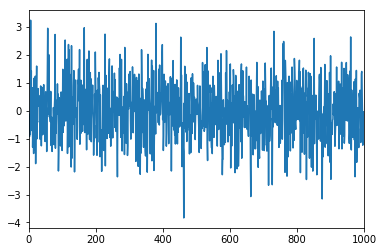

            A         B         C         D
0    1.298555 -0.321514 -0.192533  0.128217
1   -0.074059  0.655173 -0.203709 -0.828629
2   -0.807620 -0.928619  1.648273 -0.866801
3   -0.149570  1.894748 -1.948399  1.157075
4   -0.741499 -1.059087  0.353356 -0.872978
5    0.603409  0.564685 -1.878843  0.502593
6    1.787950  1.116193 -0.423682 -0.106381
7    0.176190  0.827234  0.429869 -1.074783
8    1.316008 -2.012007  0.991506 -0.400541
9    0.445713 -1.579840 -2.276574  0.483602
10   1.090643  1.319244 -1.081456 -0.015754
11   0.393221  0.331125 -0.297188 -0.299713
12   0.568461 -0.091030  0.563887 -1.026935
13  -0.776843  0.218092 -1.429844  0.971375
14  -0.925363  1.822631  0.450058 -0.029076
15  -0.816097 -0.037134 -0.985165 -0.940864
16   1.972115  0.131853  0.128391 -0.971811
17  -1.278716  1.036110  1.673816 -0.924796
18   1.376466  0.783332  1.607955 -0.609210
19   1.972234  0.940342 -0.836855 -0.366752
20   0.813593 -1.121921  0.936483  1.648390
21  -1.407434  1.919477  0.93825

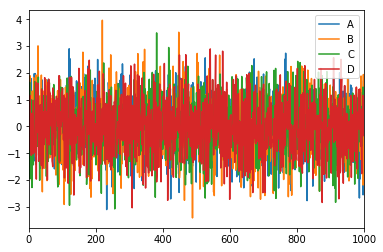

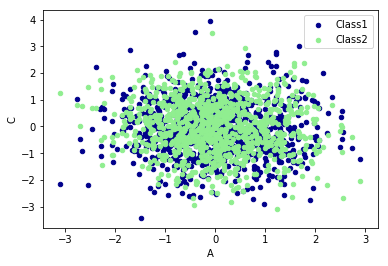

In [158]:
# 导入matplotlib
import matplotlib.pyplot as plt

# 让画图出现在“外面”
# %matplotlib 

# 让画图出现在“inline”里面
# %matplotlib inline

# 随机生成1000个数据
data = pd.Series(np.random.randn(1000), index=np.arange(1000))
# 累加
data.cumsum()
# 可视化
data.plot()
plt.show()




# DataFrame可视化
data = pd.DataFrame(
    np.random.randn(1000, 4),
    index = np.arange(1000),
    columns = list("ABCD")
)
print(data)
data.cumsum()
data.plot()
plt.show()





# 散点图
ax = data.plot.scatter(x = 'A', y='B', color='DarkBlue', label='Class1')
# 将之下这个 data 画在上一个 ax 上面
data.plot.scatter(x='A',y='C',color='LightGreen',label='Class2',ax=ax)
plt.show()